In [1]:
import xarray as xr
import numpy as np
import cartopy
import cartopy.crs as ccrs

from sys import path
path.append('../mloceanbl/')
import data


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
}

plt.rcParams.update(tex_fonts)
width = 397.48499

In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [5]:
# Select a certain lat, lon region
lat_bounds = np.array([-10, 10])
lat_bounds1 = np.array([-45, -35])
lon_bounds = np.array([-150, -120])
lon_bounds1 = np.array([60, 120])

title_label = '10S-10N 120W-150W'
fig_label = '10S_10N_120W_150W'
title_label1 = '45S-35S 60E-120E'
fig_label1 = '45S_35S_60E_120E'
# # Create the dataset
# dataset = data.dataset(lat_bounds, lon_bounds)
dataset = data.dataset(lat_bounds1, lon_bounds1)

time = dataset.time
# Normalize data according to training data
dataset.normalize()

# Obtain the indices for the train/test/val split (determined during preprocessing)
i_train, i_test, i_val = dataset.i_train, dataset.i_test, dataset.i_val

with xr.open_dataset('mldbmax_full_anomalies_weekly1.nc') as ds:
    print(ds)
    mldb = ds.copy()
    y_week = mldb['week']

with xr.open_dataset('mldb_climatology_weekly1.nc') as ds:
    print(ds)
    mldb_clim = ds.copy()

<xarray.Dataset>
Dimensions:              (lat: 230, lon: 720, testing_index: 25, time: 200, training_index: 150, validation_index: 25)
Coordinates:
  * time                 (time) datetime64[ns] 2011-08-26T12:00:00 ... 2015-06-19T12:00:00
  * lat                  (lat) float32 -54.75 -54.25 -53.75 ... 59.25 59.75
  * lon                  (lon) float32 -179.75 -179.25 -178.75 ... 179.25 179.75
  * training_index       (training_index) int64 1 2 3 4 5 ... 196 197 198 199
  * testing_index        (testing_index) int64 13 18 27 30 ... 158 173 181 182
  * validation_index     (validation_index) int64 0 8 9 15 ... 157 164 183 195
Data variables:
    salinity             (time, lat, lon) float32 ...
    salinity_anomaly     (time, lat, lon) float32 ...
    temperature          (time, lat, lon) float32 ...
    temperature_anomaly  (time, lat, lon) float32 ...
    height               (time, lat, lon) float64 ...


FileNotFoundError: [Errno 2] No such file or directory: b'/glade/work/fostdall/ml-ocean-bl/notebooks/data/mldb_full_anomalies_stdanomalies_climatology_stdclimatology.nc'

In [ ]:
###################### Tropical Pacific ##################################################
m_f = mldb.mldb.where( (mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_a = mldb.anomaly.where( (mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_a_s = mldb.std_anomaly.where( (mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_clim = mldb.climatology.where( (mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_clim_std = mldb.climatology_std.where( (mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_time = mldb.time.where((mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')

m_lat = mldb.lat.where((mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')
m_lon = mldb.lon.where((mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')

m_week = mldb.week.where((mldb.lat < lat_bounds[1]) & (mldb.lat > lat_bounds[0]) &
           (mldb.lon < lon_bounds[1]) & (mldb.lon > lon_bounds[0]) 
            ).dropna('index')

clim_lat = mldb_clim.lat[(mldb_clim.lat < lat_bounds[1]) & (mldb_clim.lat > lat_bounds[0])].values
clim_lon = mldb_clim.lon[(mldb_clim.lon < lon_bounds[1]) & (mldb_clim.lon > lon_bounds[0])].values
clims = mldb_clim.climatology[(mldb_clim.lon < lon_bounds[1]) & (mldb_clim.lon > lon_bounds[0]), 
                              (mldb_clim.lat < lat_bounds[1]) & (mldb_clim.lat > lat_bounds[0]), :].values
clims_std = mldb_clim.climatology_std[(mldb_clim.lon < lon_bounds[1]) & (mldb_clim.lon > lon_bounds[0]), 
                              (mldb_clim.lat < lat_bounds[1]) & (mldb_clim.lat > lat_bounds[0]), :].values
#################### Southern Indian ######################################################
m_f1 = mldb.mldb.where( (mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_a1 = mldb.anomaly.where( (mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_a_s1 = mldb.std_anomaly.where( (mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_clim1 = mldb.climatology.where( (mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_clim_std1 = mldb.climatology_std.where( (mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_time1 = mldb.time.where((mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')

m_lat1 = mldb.lat.where((mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')
m_lon1 = mldb.lon.where((mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')

m_week1 = mldb.week.where((mldb.lat < lat_bounds1[1]) & (mldb.lat > lat_bounds1[0]) &
           (mldb.lon < lon_bounds1[1]) & (mldb.lon > lon_bounds1[0]) 
            ).dropna('index')

clim_lat1 = mldb_clim.lat[(mldb_clim.lat < lat_bounds1[1]) & (mldb_clim.lat > lat_bounds1[0])].values
clim_lon1 = mldb_clim.lon[(mldb_clim.lon < lon_bounds1[1]) & (mldb_clim.lon > lon_bounds1[0])].values
clims1 = mldb_clim.climatology[(mldb_clim.lon < lon_bounds1[1]) & (mldb_clim.lon > lon_bounds1[0]), 
                              (mldb_clim.lat < lat_bounds1[1]) & (mldb_clim.lat > lat_bounds1[0]), :].values
clims_std1 = mldb_clim.climatology_std[(mldb_clim.lon < lon_bounds1[1]) & (mldb_clim.lon > lon_bounds1[0]), 
                              (mldb_clim.lat < lat_bounds1[1]) & (mldb_clim.lat > lat_bounds1[0]), :].values

In [6]:
date_of_interest = '2014-05-09T12:00:00.000000000'
date_label = '2014-05-09'
# date_of_interest = '2012-11-23T12:00:00.000000000'
# date_label1 = '2012-11-23'

index = np.where(time == np.datetime64(date_of_interest))[0][0]
X_d, X_l, y_d, y_l = dataset.get_index(index)
# X_d, X_l, y_d, y_l = dataset1.get_index(index)

input_dim = X_d.shape[0]
n_features = X_d.shape[1]


# string = '../saved_model/finished_full_data/45S_30S_60E_120E_finished_models_smooth'
string = '../saved_model/finished_full_data/10S_10N_150W_120W_finished_models_smooth'

# Initialize Models
l = models.MLD_ML(dataset, 'LINEAR')
l.model.load_weights(string+'/linear_test_corr_0.47')
# l.model.load_weights(string+'/linear_test_corr_0.25')
y_pred_linear = (l.evaluate(index)*dataset.y_std+dataset.y_mean)

ann = models.MLD_ML(dataset, 'LINEAR')
ann.model.load_weights(string+'/ann_test_corr_0.55')
# ann.model.load_weights(string+'/ann_test_corr_0.27')
y_pred_ann = (ann.evaluate(index)*dataset.y_std+dataset.y_mean)

vann = models.MLD_ML(dataset, 'VANN')
vann.model.load_weights(string+'/vann_test_corr_0.56')
# vann.model.load_weights(string+'/vann_test_corr_0.30')
y_pred_vann = (vann.evaluate(index)*dataset.y_std+dataset.y_mean)

dropout = models.MLD_ML(dataset, 'DROPOUT')
dropout.model.load_weights(string+'/dropout_test_corr_0.57')
# dropout.model.load_weights(string+'/dropout_test_corr_0.36')
y_pred_dropout = (dropout.evaluate(index)*dataset.y_std+dataset.y_mean)

vae = models.MLD_ML(dataset, 'VAE')
vae.model.load_weights(string+'/vae_test_corr_0.62')
# vae.model.load_weights(string+'/vae_test_corr_0.35')
y_pred_vae = (vae.evaluate(index)*dataset.y_std+dataset.y_mean)

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


In [34]:
import gp
gpr = gp.GPR(y_l)
y_pred_gp, v_gp = gpr(y_d, X_l)

clim = clims[:, :, index].flatten()
clim_std = clims_std[:, :, index].flatten()
indexes = np.where(clim>0)[0]
[LON, LAT] = np.meshgrid(clim_lon, clim_lat)
clim_lat_lon = np.stack((LON.flatten(), LAT.flatten()), axis=1)

gpr_clim = gp.GPR(clim_lat_lon[indexes])
clim_gridded, _ = gpr_clim(clim[indexes], X_l)
clim_std_gridded, _ = gpr_clim(clim_std[indexes], X_l)
clim_argo, _ = gpr_clim(clim[indexes], y_l)
clim_std_argo, _ = gpr_clim(clim_std[indexes], y_l)

In [39]:
u = vann.reanalysis(index, num_iters=200, u0 = 0.9*y_pred_vann+0.1*y_pred_gp)

Beginning Reanalysis
Epoch:  0 / 200 	 Loss: -1018.73 	 Time Remaining: 00:04:33.57
Epoch:  10 / 200 	 Loss: -1044.86 	 Time Remaining: 00:03:56.92
Epoch:  20 / 200 	 Loss: -1067.19 	 Time Remaining: 00:03:43.63
Epoch:  30 / 200 	 Loss: -1086.12 	 Time Remaining: 00:03:32.09
Epoch:  40 / 200 	 Loss: -1102.21 	 Time Remaining: 00:03:18.11
Epoch:  50 / 200 	 Loss: -1115.98 	 Time Remaining: 00:03:05.44
Epoch:  60 / 200 	 Loss: -1127.89 	 Time Remaining: 00:02:53.29
Epoch:  70 / 200 	 Loss: -1138.28 	 Time Remaining: 00:02:40.89
Epoch:  80 / 200 	 Loss: -1147.44 	 Time Remaining: 00:02:28.25
Epoch:  90 / 200 	 Loss: -1155.54 	 Time Remaining: 00:02:15.89
Epoch:  100 / 200 	 Loss: -1162.71 	 Time Remaining: 00:02:03.44
Epoch:  110 / 200 	 Loss: -1169.07 	 Time Remaining: 00:01:50.91
Epoch:  120 / 200 	 Loss: -1174.72 	 Time Remaining: 00:01:38.45
Epoch:  130 / 200 	 Loss: -1179.75 	 Time Remaining: 00:01:26.02
Epoch:  140 / 200 	 Loss: -1184.25 	 Time Remaining: 00:01:13.51
Epoch:  150 / 2

0 100


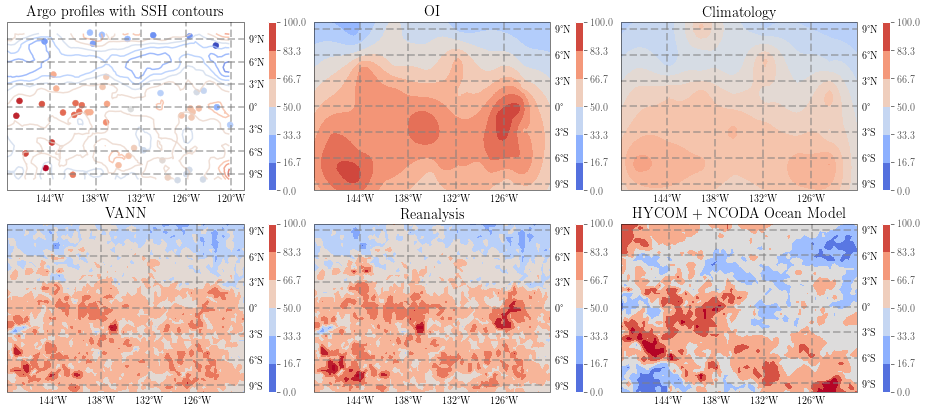

In [41]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

width1, height1 = set_size(width, subplots=(2,3))
fig = plt.figure(figsize=(3*width1, 3*height1))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.00, hspace=0.2) # set the spacing between axes. 
plt.style.use('ggplot')

##########################################################################
########################## Observations Plot #############################
##########################################################################
ax1 = plt.subplot(gs1[0], projection = ccrs.PlateCarree())

lat_points = m_lat.where(np.in1d(m_week, time[index])).dropna('index').values
lon_points = m_lon.where(np.in1d(m_week, time[index])).dropna('index').values
points = (m_a_s*m_clim_std + m_clim).where(np.in1d(m_week, time[index])).dropna('index').values

# lat_points1 = m_lat1.where(np.in1d(m_week1, time[index])).dropna('index').values
# lon_points1 = m_lon1.where(np.in1d(m_week1, time[index])).dropna('index').values
# points = (m_a_s1*m_clim_std1 + m_clim1).where(np.in1d(m_week1, time[index])).dropna('index').values

y_min = 0*int(np.round(points.min()))
y_max = 100+0*int(np.round(points.max()))
print(y_min, y_max)
clevels = np.linspace(0, 20, 10)
contour = ax1.tricontour(X_l[:,0], X_l[:,1], X_d[:,-1], cmap = 'coolwarm', alpha = 0.75)
sc = ax1.scatter(lon_points, lat_points, 
            c = points, cmap = 'coolwarm',
           s = 35, 
           transform = ccrs.PlateCarree(), 
#           label =  np.datetime_as_string(time[i_train[30]].values, 'W')
               )
ax1.set_title('Argo profiles with SSH contours')
m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
m.set_clim(y_min, y_max)
cbar1 = plt.colorbar(m, ax = ax1, boundaries=np.linspace(y_min, y_max, 7), pad = 0.08)
cbar1.ax.tick_params(labelsize=10) 
ax1.coastlines()
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_left = False
gl1.xlines = True
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'weight': 'bold'}
gl1.ylabel_style = {'weight': 'bold'}
ax1.set_aspect('auto', adjustable=None)

##########################################################################
############################### OI Plot ##################################
##########################################################################

ax2 = plt.subplot(gs1[1], projection = ccrs.PlateCarree())
c2 = ax2.tricontourf(X_l[:,0], X_l[:,1], y_pred_gp*clim_std_gridded+clim_gridded, 
                    transform = ccrs.PlateCarree(),
                    vmin = y_min,
                    vmax = y_max,
                    cmap = 'coolwarm',
                  ) 

ax2.set_title('OI')
m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
m.set_clim(y_min, y_max)
cbar2 = plt.colorbar(m, ax = ax2, boundaries=np.linspace(y_min, y_max, 7), pad = 0.08)
cbar2.ax.tick_params(labelsize=10) 
ax2.coastlines()
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl2.xlabels_top = False
gl2.ylabels_left = False
gl2.xlines = True
# gl.xlocator = mticker.FixedLocator([-115, -125, -135, -145, -155])
# gl.ylocator = mticker.FixedLocator([-15, -10, -5, 0, 5, 10, 15])
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'weight': 'bold'}
gl2.ylabel_style = {'weight': 'bold'}
ax2.set_aspect('auto', adjustable=None)

##########################################################################
########################### Climatology Plot #############################
##########################################################################

ax3 = plt.subplot(gs1[2], projection = ccrs.PlateCarree())
c = ax3.tricontourf(X_l[:,0], X_l[:,1], clim_gridded, 
                    transform = ccrs.PlateCarree(),
                    vmin = y_min,
                    vmax = y_max,
                    cmap = 'coolwarm',
                  ) 
ax3.set_title('Climatology')
m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
m.set_clim(y_min, y_max)
cbar3 = plt.colorbar(m, ax = ax3, boundaries=np.linspace(y_min, y_max, 7), pad = 0.08)
cbar3.ax.tick_params(labelsize=10) 
ax3.coastlines()
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl3.xlabels_top = False
gl3.ylabels_left = False
gl3.xlines = True
# gl.xlocator = mticker.FixedLocator([-115, -125, -135, -145, -155])
# gl.ylocator = mticker.FixedLocator([-15, -10, -5, 0, 5, 10, 15])
gl3.xformatter = LONGITUDE_FORMATTER
gl3.yformatter = LATITUDE_FORMATTER
gl3.xlabel_style = {'weight': 'bold'}
gl3.ylabel_style = {'weight': 'bold'}
ax3.set_aspect('auto', adjustable=None)

##########################################################################
############################### VANN Plot ################################
##########################################################################
ax4 = plt.subplot(gs1[3], projection = ccrs.PlateCarree())
c4 = ax4.tricontourf(X_l[:,0], X_l[:,1], y_pred_vann*clim_std_gridded+clim_gridded, 
                    transform = ccrs.PlateCarree(),
                    vmin = y_min,
                    vmax = y_max,
                    cmap = 'coolwarm')  
ax4.set_title('VANN')
m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
m.set_clim(y_min, y_max)
cbar4 = plt.colorbar(m, ax = ax4, boundaries=np.linspace(y_min, y_max, 7), pad = 0.08)
cbar4.ax.tick_params(labelsize=10) 
ax4.coastlines()
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl4.xlabels_top = False
gl4.ylabels_left = False
gl4.xlines = True
# gl.xlocator = mticker.FixedLocator([-115, -125, -135, -145, -155])
# gl.ylocator = mticker.FixedLocator([-15, -10, -5, 0, 5, 10, 15])
gl4.xformatter = LONGITUDE_FORMATTER
gl4.yformatter = LATITUDE_FORMATTER
gl4.xlabel_style = {'weight': 'bold'}
gl4.ylabel_style = {'weight': 'bold'}
ax4.set_aspect('auto', adjustable=None)

##########################################################################
########################## VANN Reanalysis Plot ##########################
##########################################################################
ax5 = plt.subplot(gs1[4], projection = ccrs.PlateCarree())

c5 = ax5.tricontourf(X_l[:,0], X_l[:,1], u*clim_std_gridded + clim_gridded,
                    transform = ccrs.PlateCarree(),
                    vmin = y_min,
                    vmax = y_max,
                    cmap = 'coolwarm')  
ax5.set_title('Reanalysis')
m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
m.set_clim(y_min, y_max)
cbar5 = plt.colorbar(m, ax = ax5, boundaries=np.linspace(y_min, y_max, 7), pad = 0.08)
cbar5.ax.tick_params(labelsize=10) 
ax5.coastlines()
gl5 = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl5.xlabels_top = False
gl5.ylabels_left = False
gl5.xlines = True
# gl.xlocator = mticker.FixedLocator([-115, -125, -135, -145, -155])
# gl.ylocator = mticker.FixedLocator([-15, -10, -5, 0, 5, 10, 15])
gl5.xformatter = LONGITUDE_FORMATTER
gl5.yformatter = LATITUDE_FORMATTER
gl5.xlabel_style = {'weight': 'bold'}
gl5.ylabel_style = {'weight': 'bold'}
ax5.set_aspect('auto', adjustable=None)
# ax5.text(-0.05, 1.05, "E", transform=ax5.transAxes,
#       fontsize=12, weight='bold');

##########################################################################
######################## HYCOM Ocean Model Plot ##########################
##########################################################################
import scipy.io as sio
ax6 = plt.subplot(gs1[5], projection = ccrs.PlateCarree())
# mat_fname = 'hycom_southernindian_nov13_dec3_2012.mat'
mat_fname = 'hycom_tpac_may01_18_2014.mat'
mat_contents = sio.loadmat(mat_fname)
lat = mat_contents['latitude']
lon = mat_contents['longitude'] - 360
LAT, LON = np.meshgrid(lat, lon)
mldb_mat = mat_contents['mldbmaxout']
mldb_model = mldb_mat[:, :, 1:8].mean(axis=2)
# mldb_model = mldb_mat[:, :, 10:17].mean(axis=2)
c6 = ax6.contourf(LON, LAT, mldb_model, 
                    transform = ccrs.PlateCarree(),
                    vmin = y_min,
                    vmax = y_max,
                    cmap = 'coolwarm')  
ax6.set_title('HYCOM + NCODA Ocean Model')
m = plt.cm.ScalarMappable(cmap=cm.coolwarm)
m.set_clim(y_min, y_max)
cbar6 = plt.colorbar(m, ax = ax6, boundaries=np.linspace(y_min, y_max, 7), pad = 0.08)
cbar6.ax.tick_params(labelsize=10) 
ax6.coastlines()
gl6 = ax6.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl6.xlabels_top = False
gl6.ylabels_left = False
gl6.xlines = True
# gl.xlocator = mticker.FixedLocator([-115, -125, -135, -145, -155])
# gl.ylocator = mticker.FixedLocator([-15, -10, -5, 0, 5, 10, 15])
gl6.xformatter = LONGITUDE_FORMATTER
gl6.yformatter = LATITUDE_FORMATTER
gl6.xlabel_style = {'weight': 'bold'}
gl6.ylabel_style = {'weight': 'bold'}
ax6.set_aspect('auto', adjustable=None)

plt.savefig('mld_spatial_patterns_max_correlation_obs_oi_climatology_vann_reanalysis_model_' + fig_label + '_' + date_label + '.pdf', format = 'pdf', bbox_inches='tight')
# plt.close()

In [48]:
import scipy.io as sio
mat_fname = 'hycom_southernindian_nov13_dec3_2012.mat'
mat_contents = sio.loadmat(mat_fname)

In [49]:
mat_contents['mldbmaxout'].shape

(126, 21, 161)

In [50]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Oct 23 13:01:53 2020',
 '__version__': '1.0',
 '__globals__': [],
 'latitude': array([[-44.95999908, -44.47999954, -44.        , -43.52000046,
         -43.04000092, -42.56000137, -42.08000183, -41.59999847,
         -41.11999893, -40.63999939, -40.15999985, -39.68000031,
         -39.20000076, -38.72000122, -38.24000168, -37.75999832,
         -37.27999878, -36.79999924, -36.31999969, -35.84000015,
         -35.36000061]]),
 'longitude': array([[ 60.        ],
        [ 60.47998047],
        [ 60.95996094],
        [ 61.43994141],
        [ 61.92004395],
        [ 62.40002441],
        [ 62.88000488],
        [ 63.35998535],
        [ 63.83996582],
        [ 64.31994629],
        [ 64.80004883],
        [ 65.2800293 ],
        [ 65.76000977],
        [ 66.23999023],
        [ 66.7199707 ],
        [ 67.19995117],
        [ 67.68005371],
        [ 68.16003418],
        [ 68.64001465],
        [ 69.11999512],
      